In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv('C:/Users/HP/Downloads/EDWISER/Project 1/credit-card-data.csv')

In [8]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())

print ("\nUnique values :  \n",df.nunique())


Missing values :   314

Unique values :  
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


# Handing Missing Value

In [12]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)


In [13]:
df['CREDIT_LIMIT'].isnull().sum()

0

In [14]:
df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [15]:
df['MINIMUM_PAYMENTS'].median()

312.343947

In [16]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [17]:
df.isnull().any().sum()

0

# ‘intelligent’ KPI’s

# 1. Monthly average purchase and cash advance amount

In [18]:
df['MONTHLY_AVG_PURCHASE']=df['PURCHASES']/df['TENURE']

In [19]:
df.MONTHLY_AVG_PURCHASE.head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: MONTHLY_AVG_PURCHASE, dtype: float64

In [20]:
df['CASH_ADVANCE_AMT']=df['CASH_ADVANCE']/df['TENURE']

In [21]:
df.CASH_ADVANCE_AMT.head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: CASH_ADVANCE_AMT, dtype: float64

# 2- Purchases by type (one-off, installments)

In [22]:
def purchase_type(df):
    if((df.ONEOFF_PURCHASES==0)&(df.INSTALLMENTS_PURCHASES==0)):
        return 'none'
    if((df.ONEOFF_PURCHASES>0)&(df.INSTALLMENTS_PURCHASES>0)):
        return 'oneoff_installment'
    if((df.ONEOFF_PURCHASES==0)&(df.INSTALLMENTS_PURCHASES>0)):
        return 'installment'
    if((df.ONEOFF_PURCHASES>0)&(df.INSTALLMENTS_PURCHASES==0)):
        return 'oneoff'

In [23]:
df['PURCHASE_TYPE']=df.apply(purchase_type,axis=1)

In [24]:
df.PURCHASE_TYPE.value_counts()

oneoff_installment    2774
installment           2260
none                  2042
oneoff                1874
Name: PURCHASE_TYPE, dtype: int64

## 3-Average amount per purchase and cash advance transaction

In [25]:
df.loc[:,['PURCHASES_TRX','CASH_ADVANCE_TRX']]

,PURCHASES_TRX,CASH_ADVANCE_TRX
0,2,0
1,0,4
2,12,0
3,1,1
4,1,0
...,...,...
8945,6,0
8946,6,0
8947,5,0
8948,0,2


# 4. Limit_usage (balance to credit limit ratio ) credit card utilization
Lower value implies cutomers are maintaing thier balance properly. Customer with lower balance to credit limit ratio means that they are being economic in their expendiature mainitaining a good credit score.

In [26]:
df['limit_usage']=df.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [27]:
df['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64


# 5- Payments to minimum payments ratio

In [28]:
df['PAYMENTS'].isnull().any()

False

In [29]:
df['MINIMUM_PAYMENTS'].isnull().any()

False

In [30]:
df['payment_minpay']=df.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [31]:
df['payment_minpay'].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: payment_minpay, dtype: float64


# Outliers removing

In [32]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,CASH_ADVANCE_AMT,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


In [33]:
df.drop(['CUST_ID'],axis=1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,CASH_ADVANCE_AMT,PURCHASE_TYPE,limit_usage,payment_minpay
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,oneoff,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,oneoff,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,oneoff,0.681429,2.771075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,1000.0,325.594462,48.886365,0.500000,6,48.520000,0.000000,installment,0.028494,6.660231
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,1000.0,275.861322,312.343947,0.000000,6,50.000000,0.000000,installment,0.019183,0.883197
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,1000.0,81.270775,82.418369,0.250000,6,24.066667,0.000000,installment,0.023399,0.986076
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,500.0,52.549959,55.755628,0.250000,6,0.000000,6.093130,none,0.026915,0.942505


In [34]:
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522636
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.852446
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
MONTHLY_AVG_PURCHASE                 8.004530
CASH_ADVANCE_AMT                     4.944361
limit_usage                          7.416991
payment_minpay                      43.004196
dtype: float64

Those with the positive skew value has a right-skewed distribution, indicating the presence of extreme higher values and similarly those with negative skew values has left-skewed distribution. Therefore we will be doing log transformation of our data for trying to restore the symmetry of our data.

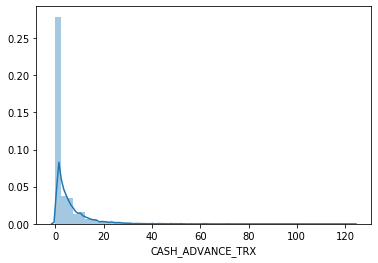

In [35]:
sns.distplot(df['CASH_ADVANCE_TRX'])

{'whiskers': [<matplotlib.lines.Line2D at 0x121af290f08>,
 'caps': [<matplotlib.lines.Line2D at 0x121af298cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x121af290a88>],
 'medians': [<matplotlib.lines.Line2D at 0x121af298e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x121af29dd08>],
 'means': []}

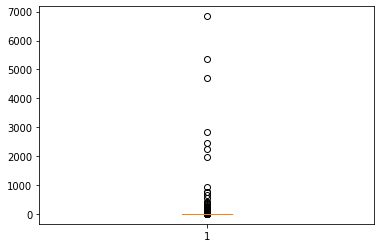

In [36]:
plt.boxplot(df["payment_minpay"])

for example,this two variables right skewed.Among them,'payment_minpay' is highly right skewed oe positively skewed.

Let's see an example of left skewed variable

{'whiskers': [<matplotlib.lines.Line2D at 0x121af305f88>,
 'caps': [<matplotlib.lines.Line2D at 0x121af308ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x121af3057c8>],
 'medians': [<matplotlib.lines.Line2D at 0x121af308c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x121af310b08>],
 'means': []}

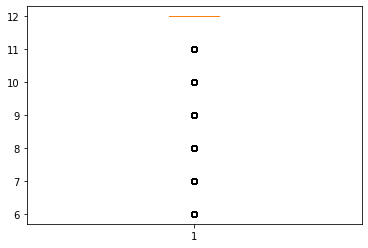

In [37]:
plt.boxplot(df['TENURE'])

Next variable we're going to see has a skewness ~ 0

{'whiskers': [<matplotlib.lines.Line2D at 0x121af36af08>,
 'caps': [<matplotlib.lines.Line2D at 0x121af370c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x121af36a988>],
 'medians': [<matplotlib.lines.Line2D at 0x121af370dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x121af376c88>],
 'means': []}

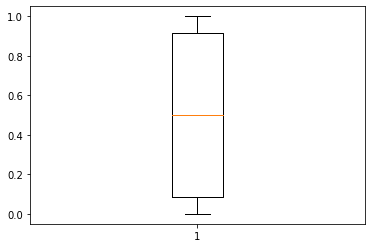

In [38]:
plt.boxplot(df['PURCHASES_FREQUENCY'])

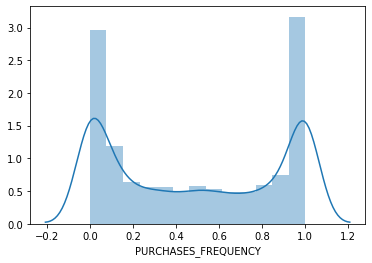

In [39]:
sns.distplot(df['PURCHASES_FREQUENCY'])

In [40]:
df_cln=df.drop(['CUST_ID','PURCHASE_TYPE'],axis=1).astype(int).applymap(lambda i: np.log(i) if i>0 else 0)
print("\n before log transformation\n",df.skew())
print("\n after log tranformation\n",df_cln.skew())


 before log transformation
 BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522636
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.852446
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
MONTHLY_AVG_PURCHASE                 8.004530
CASH_ADVANCE_AMT                     4.944361
limit_usage                          7.416991
payment_minpay                      43.004196
dtype

As we derived KPIs using 
these variables:'BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT'
we can make a clean dataframe without these variables which will make it a lot easier for our model to learn and for us to explore more later or make use of those KPIs we derived.

In [41]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
df_pre=df_cln[[x for x in df_cln.columns if x not in col ]]
df_pre.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,CASH_ADVANCE_AMT,limit_usage,payment_minpay
0,0.0,0.000000,4.553877,0.0,0.0,0.0,0.0,0.000000,0.693147,1.945910,0.000000,0.0,0.000000
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.386294,0.000000,0.000000,6.284134,0.0,1.098612
2,0.0,6.650279,0.000000,0.0,0.0,0.0,0.0,0.000000,2.484907,4.158883,0.000000,0.0,0.000000
3,0.0,7.312553,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,4.820282,2.833213,0.0,0.000000
4,0.0,2.772589,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.693147


# Insights derivation from KPI

In [42]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'MONTHLY_AVG_PURCHASE', 'CASH_ADVANCE_AMT', 'PURCHASE_TYPE',
       'limit_usage', 'payment_minpay'],
      dtype='object')

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

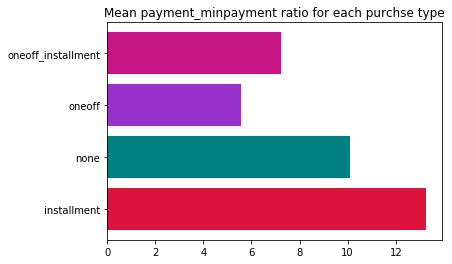

In [43]:
x=df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['payment_minpay']))
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center',color=['crimson', 'teal', 'darkorchid', 'mediumvioletred'])
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

## customers with installment purchases are paying dues

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

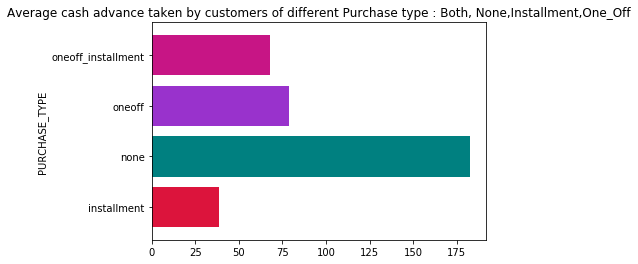

In [44]:
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['CASH_ADVANCE_AMT'])).plot.barh(y=range(len(x)), width=0.8,align='center',color=['crimson', 'teal', 'darkorchid', 'mediumvioletred'])

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

## Balance of customers of different Purchase type

Text(0.5, 1.0, 'Limit usage ratio of customers of different purchase type')

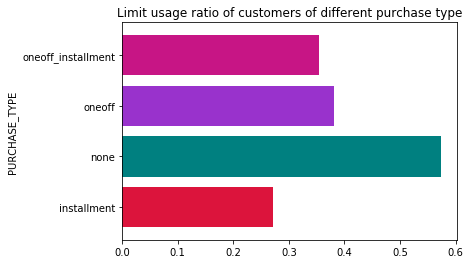

In [45]:
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['limit_usage'])).plot.barh(y=range(len(x)), width=0.8,align='center',color=['crimson', 'teal', 'darkorchid', 'mediumvioletred'])
plt.title('Limit usage ratio of customers of different purchase type')

Limit_usage = Balance:Credit Limit
Therefore, the customers who don't do either one-off or installment purchases tend to have higher limit_usage ratio i.e more balance than other customers.

## Customers who don't do either one-off or installment purchases take more cash on advance

Text(0.5, 1.0, 'Customers who do not do either one-off or installment purchases take more cash on advance')

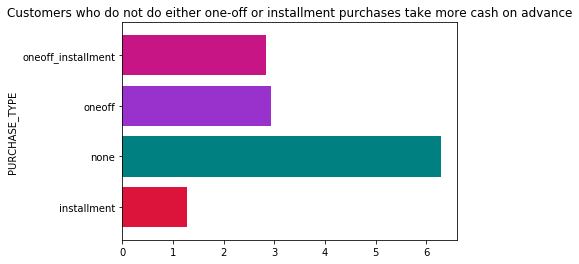

In [46]:
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['CASH_ADVANCE_TRX'])).plot.barh(y=range(len(x)), width=0.8,align='center',color=['crimson', 'teal', 'darkorchid', 'mediumvioletred'])
plt.title('Customers who do not do either one-off or installment purchases take more cash on advance')

## Average purchase transaction by Customers of different purchase types

Text(0.5, 1.0, 'Average purchase transaction by Customers of different purchase types')

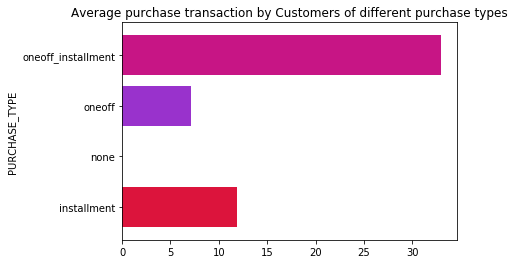

In [47]:
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['PURCHASES_TRX'])).plot.barh(y=range(len(x)), width=0.8,align='center',color=['crimson', 'teal', 'darkorchid', 'mediumvioletred'])
plt.title('Average purchase transaction by Customers of different purchase types')

## Categorical to numerical

In [48]:
df_pre['PURCHASE_TYPE']=df.loc[:,'PURCHASE_TYPE']
df_dummy=pd.concat([df_pre,pd.get_dummies(df_pre['PURCHASE_TYPE'])],axis=1)
df_dummy=df_dummy.drop(['PURCHASE_TYPE'],axis=1)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   MONTHLY_AVG_PURCHASE              8950 non-null   float64
 10  CASH_ADVANCE_AMT                  8950 non-null   float64
 11  limit_usage                       8950 non-null   float64
 12  paymen

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


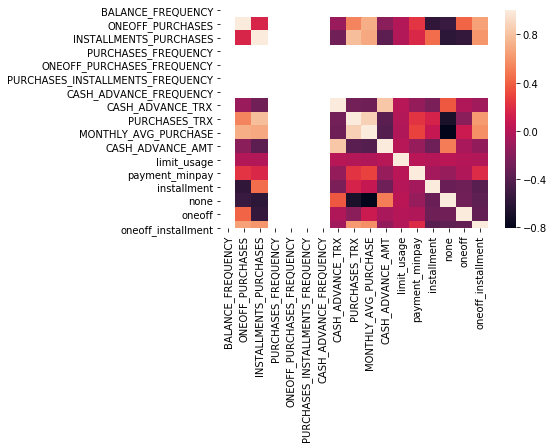

In [49]:
sns.heatmap(df_dummy.corr())


In [50]:
df_dummy_cln=df_dummy.drop(['BALANCE_FREQUENCY','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'],axis=1)

In [51]:
df_dummy.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'MONTHLY_AVG_PURCHASE',
       'CASH_ADVANCE_AMT', 'limit_usage', 'payment_minpay', 'installment',
       'none', 'oneoff', 'oneoff_installment'],
      dtype='object')

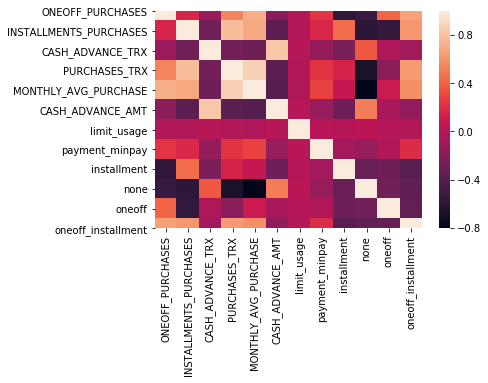

In [52]:
sns.heatmap(df_dummy_cln.corr())

In [53]:
df_frequency= pd.concat([df_dummy_cln,df.loc[:,['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']]],axis=1)
df_frequency= pd.concat([df_frequency,df.loc[:,'BALANCE_FREQUENCY']],axis=1)

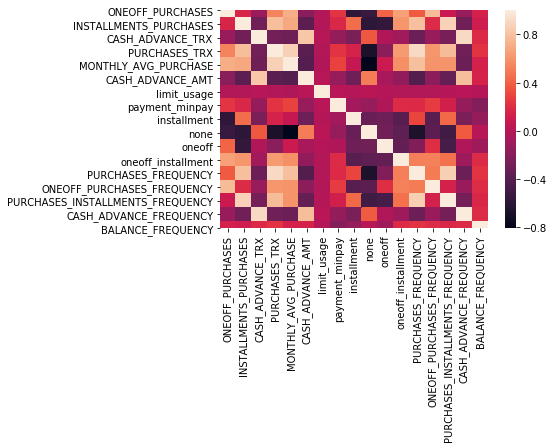

In [54]:
sns.heatmap(df_frequency.corr())

# Informations from Heatmap
- One-off purchases and installment purchases are highly correlated with purchase transaction and negatively correlated with cash-advance=transaction.
- Purchase Frequency is more correlated with Installment purchases than One-off purchases.
- Purchase Transaction is highly correlated with Monthly average transaction
- Customers who does both one-off and installmentment purchases tend to have higher purchase frequency.Their Monthly average purchases are also higher than other customers
- Customer who doesn't do either of both the purchases tend to transact more during purchase rather than advance transactions


## Application Of PCA to reduce features

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled=sc.fit_transform(df_dummy)

In [56]:
from sklearn.decomposition import PCA

In [57]:
#df_dummy.shape =(8950,17)
pc=PCA(n_components=17)
df_pca=pc.fit(df_scaled)
print(sum(df_pca.explained_variance_ratio_))

1.0


In [58]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

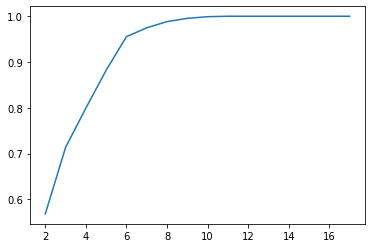

In [59]:
pd.Series(var_ratio).plot()

6 components are explaining more than 90% variance

In [60]:
pc_final=PCA(n_components=6).fit(df_scaled)
reduced_df=pc_final.fit_transform(df_scaled)
df_reduced=pd.DataFrame(reduced_df)

In [61]:
df_reduced.head()

,0,1,2,3,4,5
0,-0.294429,-2.475769,-0.787012,-0.356539,0.091810,0.476673
1,-3.415201,0.299220,1.076697,0.563368,-0.288226,-0.385478
2,0.542823,1.318987,-2.479401,-0.546276,0.205550,0.691853
3,-0.307025,1.745250,-2.297101,-0.725305,0.309019,0.461096
4,-1.344692,0.587192,-2.596112,0.334760,-0.200684,0.387496


Our 17 variables got reduced to 6 variables

In [62]:
col_list=df_dummy.columns
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.000000e+00,-1.110223e-16,3.469447e-17,-6.071532e-18,-5.589062e-17,-1.019150e-17
ONEOFF_PURCHASES,2.996148e-01,4.982372e-01,-7.613346e-02,-1.178821e-02,6.454771e-04,7.977558e-02
INSTALLMENTS_PURCHASES,3.729316e-01,-2.731774e-01,3.060010e-01,-7.271651e-02,3.417199e-02,-6.782120e-03
PURCHASES_FREQUENCY,0.000000e+00,3.469447e-18,2.775558e-17,-0.000000e+00,2.775558e-17,1.110223e-16
ONEOFF_PURCHASES_FREQUENCY,0.000000e+00,0.000000e+00,-0.000000e+00,-5.551115e-17,-2.775558e-17,0.000000e+00
PURCHASES_INSTALLMENTS_FREQUENCY,6.617445e-24,0.000000e+00,-0.000000e+00,1.387779e-17,-1.110223e-16,3.469447e-18
CASH_ADVANCE_FREQUENCY,0.000000e+00,-4.235165e-22,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
CASH_ADVANCE_TRX,-2.269745e-01,2.393522e-01,4.046461e-01,-4.115645e-01,2.182973e-01,-2.490959e-01
PURCHASES_TRX,4.197847e-01,-8.282934e-03,1.509234e-01,-1.251365e-01,6.697788e-02,-3.212485e-02
MONTHLY_AVG_PURCHASE,4.337853e-01,1.013804e-01,-1.680106e-02,-1.669094e-01,1.021396e-01,-1.208297e-01


In [63]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.382275
PC_1    0.185754
PC_2    0.145342
PC_3    0.085913
PC_4    0.082864
PC_5    0.073220
dtype: float64

# Clustering

In [64]:
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(reduced_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [65]:
pd.Series(km_4.labels_).value_counts()

3    2774
1    2254
2    2049
0    1873
dtype: int64

In [66]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_df )
    cluster_errors.append( clusters.inertia_ )

In [67]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,102606.532889
1,2,71290.026859
2,3,52485.473822
3,4,33817.590063
4,5,25904.130327
5,6,21646.484528
6,7,18786.730780
7,8,16779.100792
8,9,14930.645884
9,10,13451.331473


C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


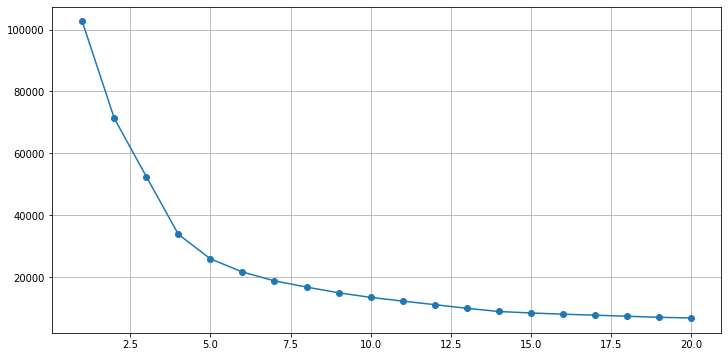

In [68]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.grid(True)

From above graph we will find elbow range. here it is 4,5,6

# Silhouette Coefficient

In [69]:
from sklearn import metrics

In [70]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_df)
    scores.append(metrics.silhouette_score(reduced_df, km.labels_))

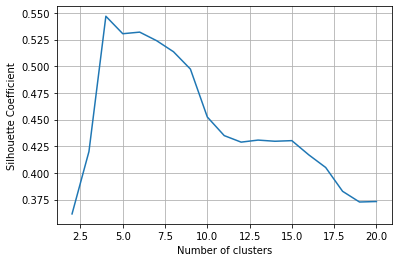

In [71]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

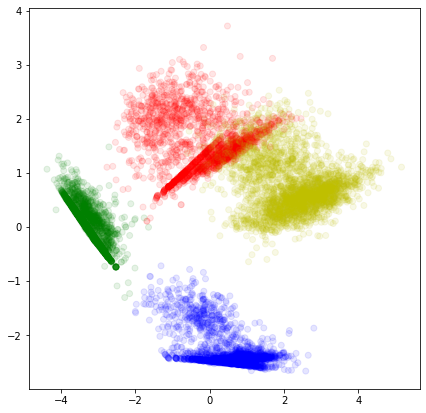

In [84]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=label_color,cmap='Spectral',alpha=0.1)

Even though we can see 4 clusters arriving but it is little difficult to understand this way as the clusters might overlap one on another and also we're unable to get individual plot for each cluster this way

In [72]:
df_pair_plot=pd.DataFrame(reduced_df,columns=['PC_' +str(i) for i in range(6)])

In [73]:
df_pair_plot['Cluster']=km_4.labels_

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


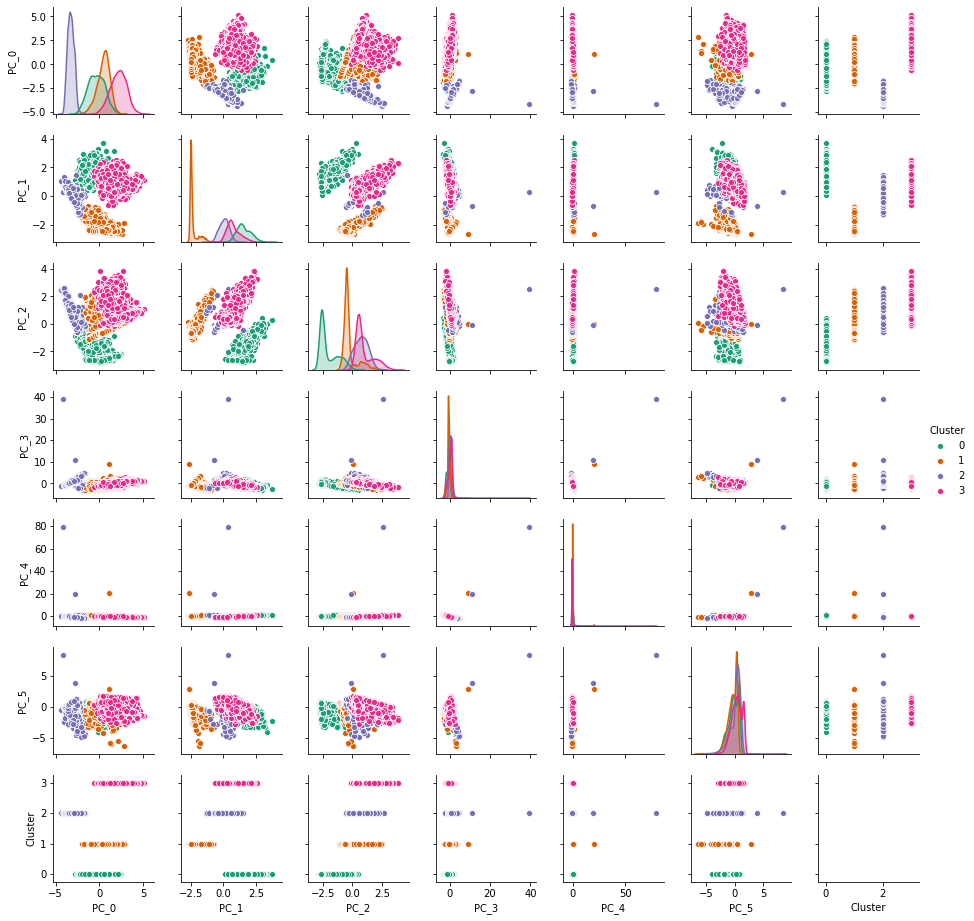

In [74]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

It shows that first two components are able to indentify clusters

In [75]:
df_original=pd.concat([df,pd.get_dummies(df['PURCHASE_TYPE'])],axis=1)

In [76]:
df_original.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'MONTHLY_AVG_PURCHASE', 'CASH_ADVANCE_AMT', 'PURCHASE_TYPE',
       'limit_usage', 'payment_minpay', 'installment', 'none', 'oneoff',
       'oneoff_installment'],
      dtype='object')

In [78]:
col_kpi=['PURCHASES_TRX','CREDIT_LIMIT','MONTHLY_AVG_PURCHASE', 'CASH_ADVANCE_AMT',
       'limit_usage', 'payment_minpay', 'installment', 'none', 'oneoff',
       'oneoff_installment']
cluster_df_4=pd.concat([df_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [79]:
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,7.113187,11.929015,0.005857,32.959625
CREDIT_LIMIT,4516.729926,3360.343116,4036.245323,5738.829463
MONTHLY_AVG_PURCHASE,69.726164,47.094484,0.005397,192.685172
CASH_ADVANCE_AMT,78.767909,37.074948,184.048580,67.821985
limit_usage,0.381034,0.270892,0.573693,0.353548
payment_minpay,5.569928,13.279765,10.072750,7.236982
installment,0.000000,1.000000,0.002928,0.000000
none,0.000000,0.000000,0.996584,0.000000
oneoff,1.000000,0.000000,0.000488,0.000000
oneoff_installment,0.000000,0.000000,0.000000,1.000000


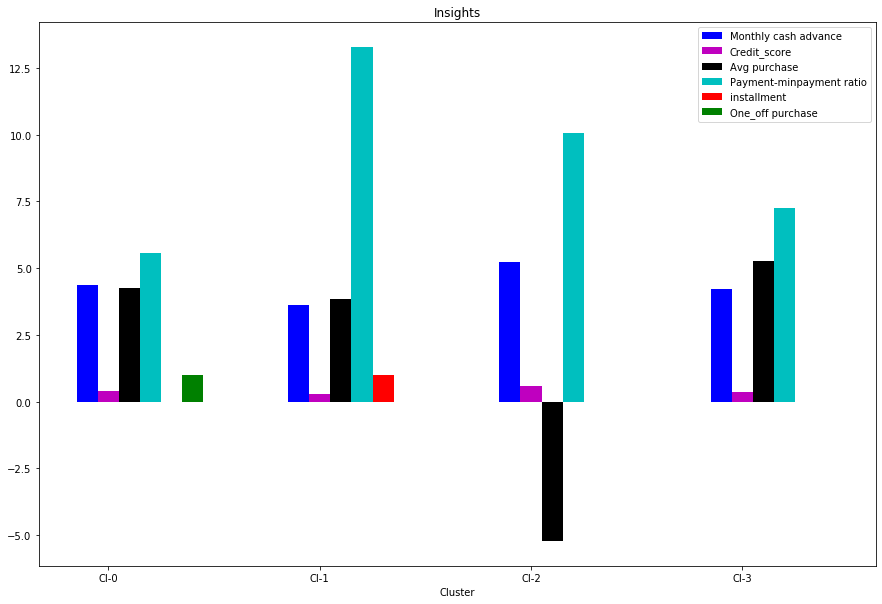

In [94]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['CASH_ADVANCE_AMT',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['MONTHLY_AVG_PURCHASE',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['oneoff',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

## Insights

4 Clusters are clearly distinguishing behavior within customers

## Percentage of each cluster in the total customer base

In [83]:
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster -4 
   Size  Percentage
0  1873   20.927374
1  2254   25.184358
2  2049   22.893855
3  2774   30.994413


# Conclusion with 4 Clusters

## Monthly cash advance Transaction
- Highest:Cluster 2
- lowest:Cluster 1
- Similar(aprox):Cluster 0,Cluster 3
## Highest Credit score
- cluster 2
## Average Purchase
- Highest: Cluster 3
- Lowest: Cluster 2
## Payment to min_payment ratio
- Highest:Cluster 1
- Lowest: Cluster 0
## Only one_off purchase done by customer of Cluster
- Cluster 0
## Only installment purchase done by customer of Cluster
- Cluster 1

## Finding behaviour with 5 Clusters:

In [85]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_df)

Text(0, 0.5, 'PC_1')

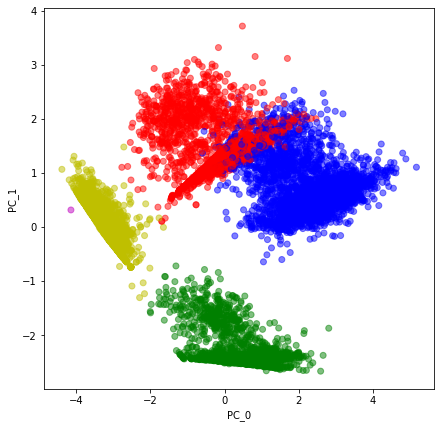

In [91]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'m'}
label_color=[color_map[l] for l in km_5.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=label_color,cmap='Spectral',alpha=0.5)
#plt.scatter(reduced_df[:,0],reduced_df[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

The fifth cluster is not quite distinguisabale and first two clusters are overlapping on each other.

In [95]:
cluster_df_5=pd.concat([df_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)
cluster_5=cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_5

Cluster_5,0,1,2,3,4
PURCHASES_TRX,7.113187,32.959625,11.929015,0.005859,0.000000
CREDIT_LIMIT,4516.729926,5738.829463,3360.343116,4038.191732,50.000000
MONTHLY_AVG_PURCHASE,69.726164,192.685172,47.094484,0.005400,0.000000
CASH_ADVANCE_AMT,78.767909,67.821985,37.074948,183.907458,473.064972
limit_usage,0.381034,0.353548,0.270892,0.566205,15.909951
payment_minpay,5.569928,7.236982,13.279765,10.068658,18.452197
installment,0.000000,0.000000,1.000000,0.002930,0.000000
none,0.000000,0.000000,0.000000,0.996582,1.000000
oneoff,1.000000,0.000000,0.000000,0.000488,0.000000
oneoff_installment,0.000000,1.000000,0.000000,0.000000,0.000000


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


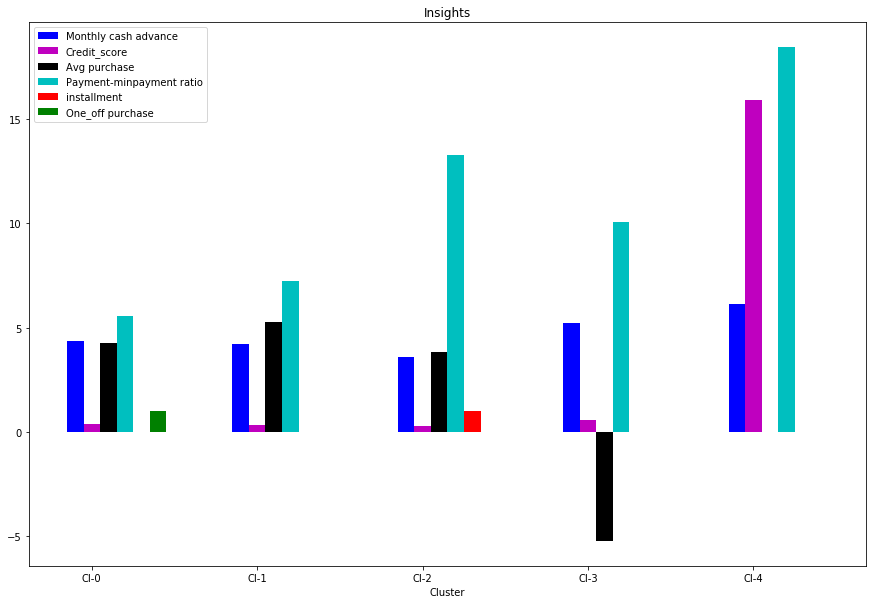

In [97]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_5.columns))

cash_advance=np.log(cluster_5.loc['CASH_ADVANCE_AMT',:].values)
credit_score=(cluster_5.loc['limit_usage',:].values)
purchase= np.log(cluster_5.loc['MONTHLY_AVG_PURCHASE',:].values)
payment=cluster_5.loc['payment_minpay',:].values
installment=cluster_5.loc['installment',:].values
one_off=cluster_5.loc['oneoff',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4'))
plt.legend()

# Conclusion with 5 Clusters

## Monthly cash advance Transaction
- Highest:Cluster 4
- Next to highest: Cluster 3
- lowest:Cluster 2
- Similar(aprox):Cluster 0,Cluster 1
## Credit score
- Highest:cluster 4
- Lowest Cluster 3
## Average Purchase
- Highest: Cluster 1
- Lowest: Cluster 3
## Payment to min_payment ratio
- Highest:Cluster 4
- Lowest: Cluster 0
## Only one_off purchase done by customer of Cluster
- Cluster 0
## Only installment purchase done by customer of Cluster
- Cluster 2

## Percentage of each cluster in the total customer base

In [101]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print ("Cluster-5"),'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5
   Size  Percentage
0  1873   20.927374
1  2774   30.994413
2  2254   25.184358
3  2048   22.882682
4     1    0.011173


# Finding behavior with 6 clusters

In [102]:
km_6=KMeans(n_clusters=6).fit(reduced_df)

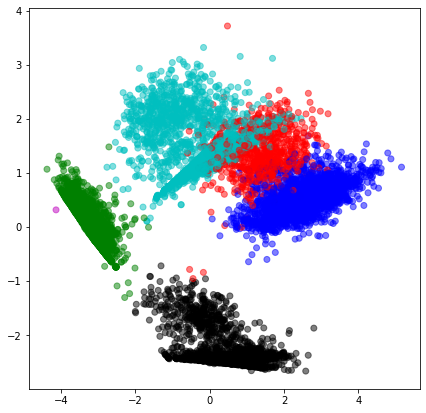

In [104]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=label_color,cmap='Spectral',alpha=0.5)

First,Second.Fourth clusters are overlapping on each other

In [106]:
cluster_df_6=pd.concat([df_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)
cluster_6=cluster_df_6.groupby('Cluster_6')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_6

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,30.096354,34.040796,0.005859,7.095620,0.000000,11.915593
CREDIT_LIMIT,6020.572917,5635.180562,4038.191732,4515.136299,50.000000,3354.381779
MONTHLY_AVG_PURCHASE,157.763506,206.661202,0.005400,68.779536,0.000000,47.067996
CASH_ADVANCE_AMT,240.407669,3.810814,183.907458,77.941331,473.064972,36.001074
limit_usage,0.567656,0.272180,0.566205,0.380784,15.909951,0.270609
payment_minpay,4.120001,8.422539,10.068658,5.569787,18.452197,13.292025
installment,0.003906,0.000000,0.002930,0.000000,0.000000,1.000000
none,0.000000,0.000000,0.996582,0.000000,1.000000,0.000000
oneoff,0.001302,0.000000,0.000488,1.000000,0.000000,0.000000
oneoff_installment,0.994792,1.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


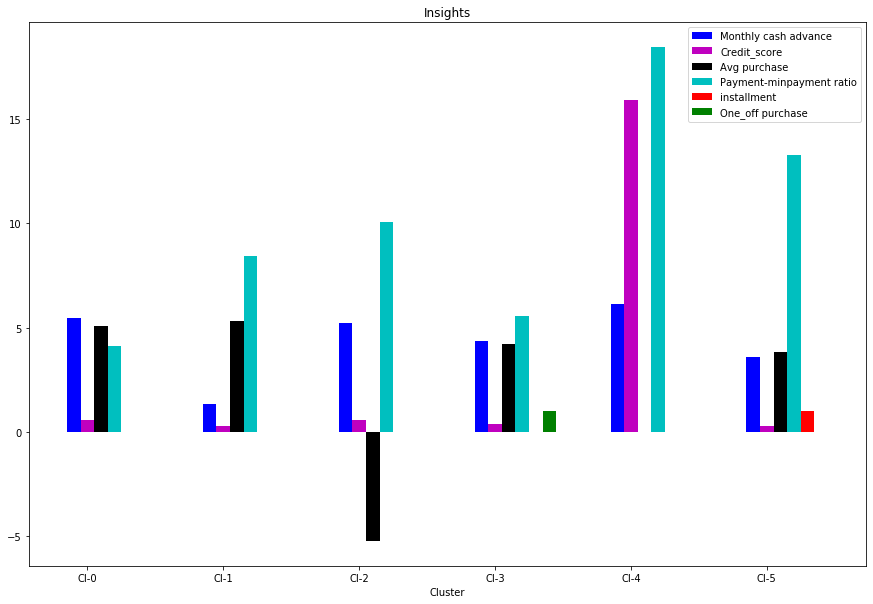

In [107]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_6.columns))

cash_advance=np.log(cluster_6.loc['CASH_ADVANCE_AMT',:].values)
credit_score=(cluster_6.loc['limit_usage',:].values)
purchase= np.log(cluster_6.loc['MONTHLY_AVG_PURCHASE',:].values)
payment=cluster_6.loc['payment_minpay',:].values
installment=cluster_6.loc['installment',:].values
one_off=cluster_6.loc['oneoff',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))
plt.legend()

# Conclusion with 6 Clusters

## Monthly cash advance Transaction
- Highest:Cluster 4
- Next to highest: Cluster 0
- lowest:Cluster 1
- Decrement Order of clusters: 4,0,2,3,5,1
## Credit score
- Highest:cluster 4
- Lowest Cluster 1
## Average Purchase
- Highest: Cluster 1 ,Cluster 0
- Lowest: Cluster 2
## Payment to min_payment ratio
- Highest:Cluster 4
- Lowest: Cluster 0
## Only one_off purchase done by customer of Cluster
- Cluster 3
## Only installment purchase done by customer of Cluster
- Cluster 5

## Performance metrics for Kmeans

In [110]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score

In [111]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_df)
    score_c[n]=calinski_harabaz_score(reduced_df,km_score.labels_)
    score[n]=silhouette_score(reduced_df,km_score.labels_)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: Deprec

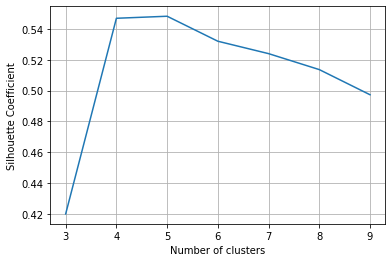

In [114]:
pd.Series(score).plot()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

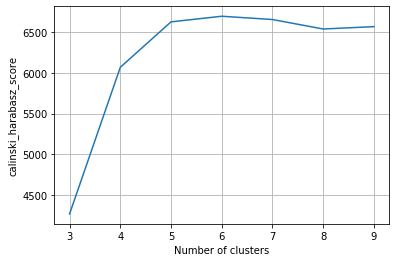

In [116]:
pd.Series(score_c).plot()
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabasz_score')
plt.grid(True)

## Performance metrics also suggest that K-means with 4 cluster is able to show distinguished characteristics of each cluster.

## Insights with 4 Clusters
- Cluster 0 customers are doing maximum One_Off transactions and least payment ratio and credit_score on lower side though higher than cluster 1;This group is about 21% of the total customer base
- Cluster 1 customers have maximum Payment ratio and are paying dues and are doing maximum installment purchases and has a credit_score on lower side. This group is about 25% of the total customer base
- Cluster 2 is taking maximum advance_cash and have lower payment ratio i.e is paying comparatively less minimum payment and even though maintaining highest credit_score & doing no purchase transaction. This group is about 23% of the total customer base
- Cluster 3 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off purchases, have comparatively better credit score than cluster 1 customers. This group is about 31% of the total customer base

## Marketing Strategy Suggested:
- A. Group 0
  - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
- B. Group 1:
  - They are potential target customers who are  only doing installment purchases and paying dues but with a lower credit score So we can increase credit limit or can lower down interest rate or they can be given premium card /loyality cards to increase transactions
- C. Group 1
   - Even though they have highest credit score i.e not using their credit limit very much and not doing any kind of purchase very much even if they do then they're only taking only cash on advance. We can target them by providing less interest rate on purchase transaction.
- d. Group 3
  - This group is doing both one-off and installment purchese and performing best among all as cutomers ,are maintaining good credit score and paying dues on time.Good point is they falls under the highest percentage of customer base. Giving rewards point will make them perform more purchases.
